# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

## Load and display the data

In [2]:
#read and loading data
ydata=pd.read_csv("ground_truth.csv")
xdata=pd.read_csv("Tweets.csv")

print(xdata.shape,ydata.shape)

(11099, 21) (11098, 1)


#### the first row is by default choosen as columns title so we have to explicitly entionion in our grounth truth 

In [3]:
#loading test data with custom header/title

xdata=pd.read_csv("Tweets.csv")
ydata=pd.read_csv("ground_truth.csv",names=["label"])
print(xdata.shape,ydata.shape)

#now we can see that the shape of both the dataset is equal  (number of data points)

(11099, 21) (11099, 1)


In [4]:
print(xdata.columns)

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'is_quote_status', 'retweet_count',
       'favorite_count', 'lang', 'user_name', 'user_screen_name',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_created_at', 'user_favourites_count', 'user_verified',
       'user_statuses_count'],
      dtype='object')


#### data.info() will tell us about the data type count of null and non null values  which will help us in data preprocessing 

In [5]:
xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created_at             11099 non-null  object 
 1   id                     11099 non-null  float64
 2   id_str                 11099 non-null  float64
 3   text                   11099 non-null  object 
 4   truncated              11099 non-null  bool   
 5   entities               11099 non-null  object 
 6   metadata               11099 non-null  object 
 7   source                 11099 non-null  object 
 8   is_quote_status        11099 non-null  bool   
 9   retweet_count          11099 non-null  int64  
 10  favorite_count         11099 non-null  int64  
 11  lang                   11099 non-null  object 
 12  user_name              11099 non-null  object 
 13  user_screen_name       11099 non-null  object 
 14  user_followers_count   11099 non-null  int64  
 15  us

In [6]:
xdata.iloc[0]

created_at                                  Tue Jul 31 13:34:34 +0000 2018
id                                                   1024290000000000000.0
id_str                                               1024290000000000000.0
text                     RT @EdwardTHardy: The 7th US Circuit Court of ...
truncated                                                            False
entities                 {'hashtags': [], 'symbols': [], 'user_mentions...
metadata                 {'iso_language_code': 'en', 'result_type': 're...
source                   <a href="http://twitter.com/download/android" ...
is_quote_status                                                      False
retweet_count                                                          113
favorite_count                                                           0
lang                                                                    en
user_name                                                      Sherry Wahl
user_screen_name         

In [7]:
#checking shape of the data ie the number of rows and columns of the data
print(xdata.shape,ydata.shape)

(11099, 21) (11099, 1)


In [8]:
print("Number of positive tweet ",sum(ydata['label']))
print("Number of positive tweet ",ydata.shape[0]-sum(ydata['label']))

Number of positive tweet  860.0
Number of positive tweet  10239.0


## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

#### before the exploratory data analysis it is a good practice to check the stats of our data which we will do with pandas describe function which will explain the important statistics feature of our data such as mean,median, standard deviation and percentile of the data 

In [9]:
# your code here
xdata.describe()

,id,id_str,retweet_count,favorite_count,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count
count,1.109900e+04,1.109900e+04,11099.000000,11099.000000,1.109900e+04,11099.000000,11099.000000,11099.000000,1.109900e+04
mean,1.024290e+18,1.024290e+18,2777.956392,0.039463,6.009168e+03,1442.336337,47.017479,19413.978286,3.476254e+04
std,0.000000e+00,0.000000e+00,12180.169923,1.013902,2.013144e+05,7645.949991,254.953725,39144.906425,8.879138e+04
min,1.024290e+18,1.024290e+18,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,1.024290e+18,1.024290e+18,0.000000,0.000000,1.310000e+02,194.000000,0.000000,1052.000000,2.543000e+03
50%,1.024290e+18,1.024290e+18,13.000000,0.000000,4.030000e+02,442.000000,3.000000,5538.000000,9.943000e+03
75%,1.024290e+18,1.024290e+18,428.500000,0.000000,1.249000e+03,1116.000000,19.000000,19576.500000,3.418700e+04
max,1.024290e+18,1.024290e+18,413719.000000,101.000000,2.021186e+07,510292.000000,12895.000000,635920.000000,2.848360e+06


## Part-1
*Vectorize tweets using only meta data*

In [10]:
print(xdata.columns)

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'is_quote_status', 'retweet_count',
       'favorite_count', 'lang', 'user_name', 'user_screen_name',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_created_at', 'user_favourites_count', 'user_verified',
       'user_statuses_count'],
      dtype='object')


### feature extraction and importance
#### there are boolean variable ->we change them 0 or 1
#### there are numerical variable which we will user directly and after dividing them on basis of mean and median
#### we extract the values from feature metadata

#### feature metadata

In [11]:
##checking feature metadata

print(xdata['metadata'][0])
print("\n")
print(xdata['metadata'][0][23:25],xdata['metadata'][0][44:50])

{'iso_language_code': 'en', 'result_type': 'recent'}


en recent


#### feature truncated

truncated
False    9491
True     1608
Name: count, dtype: int64

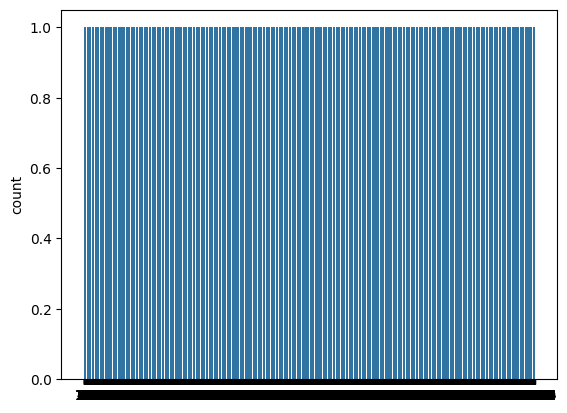

In [12]:
## exploring feature truncated
#Trucated is a boolean variable so we just put 0 or 1 in place of false and true respectively
xdata['truncated'].value_counts()
sns.countplot(xdata['truncated'])
plt.plot()
xdata['truncated'].value_counts()

In [13]:
list_truncated=pd.get_dummies(xdata['truncated'])
print("shape of truncated DataFrame: ",list_truncated.shape)
list_truncated.head()

shape of truncated DataFrame:  (11099, 2)


,False,True
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


#### exploring feature is_quote_status

Number of True and false: 
is_quote_status
False    9944
True     1155
Name: count, dtype: int64


[]

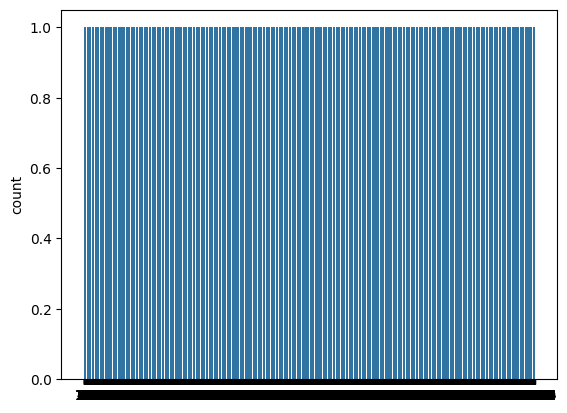

In [14]:
## exploring feature is_quote_status

#is_quote_status is a boolean variable so we just put 0 or 1 in place of false and true respectively
print("Number of True and false: ")
print(xdata['is_quote_status'].value_counts())
sns.countplot(xdata['is_quote_status'])
plt.plot()

In [15]:
list_is_quote_status=pd.get_dummies(xdata['is_quote_status'])
print(list_is_quote_status)
list_is_quote_status.head()

       False  True 
0       True  False
1       True  False
2       True  False
3       True  False
4       True  False
...      ...    ...
11094   True  False
11095   True  False
11096   True  False
11097   True  False
11098   True  False

[11099 rows x 2 columns]


,False,True
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


#### exploring feature user_verified

user_verified
False    10924
True       175
Name: count, dtype: int64


[]

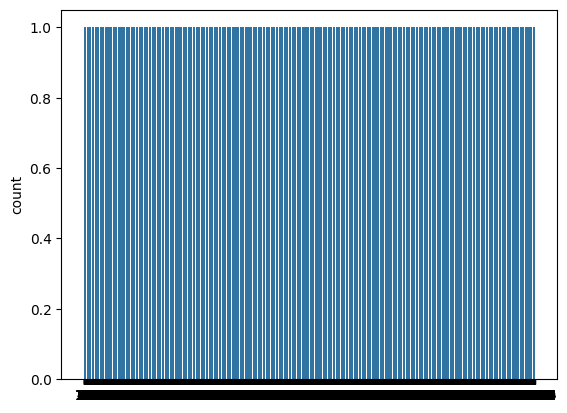

In [16]:
## exploring feature user_verified
#user_verified is a boolean variable so we just put 0 or 1 in place of false and true respectively
print(xdata['user_verified'].value_counts())
sns.countplot(xdata['user_verified'])
plt.plot()

In [17]:
# for feature source we have two category either tweet is done from iphone or either is done from 
# android phone so we divide it in binary feature
list_android=[]
list_iphone=[]
list_android_count=[]
list_iphone_count=[]
for i in range(xdata.shape[0]):
    if xdata['source'][i].find("iPhone")>=0:
        list_iphone.append("iphone")
        list_android.append("android")
        list_android_count.append(0)
        list_iphone_count.append(1)
    else:
        list_iphone.append("android")
        list_android.append("iphone")
        list_android_count.append(1)
        list_iphone_count.append(0)
print("count of tweet by android ,iphone:  ",sum(list_android_count),sum(list_iphone_count))
print("shape of feature list               ",len(list_android_count),len(list_iphone_count))

count of tweet by android ,iphone:   6711 4388
shape of feature list                11099 11099


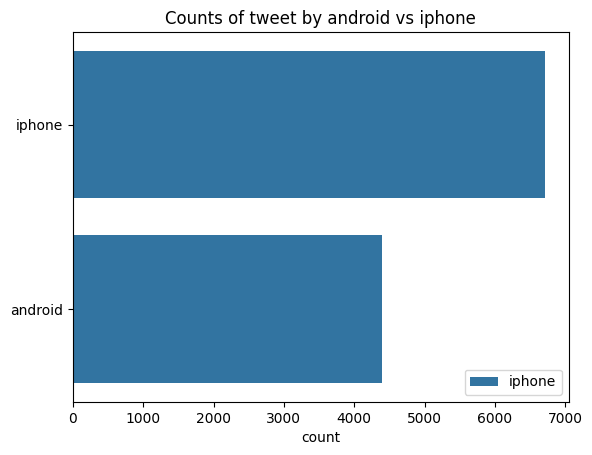

In [18]:
sns.countplot(list_android)
plt.legend(["iphone","android"])
plt.title('Counts of tweet by android vs iphone')
plt.show()

In [19]:
##total positive tweets done by android / total tweets by android
## i.e percentage/average positive tweet from android
pos_sum=0
print(ydata.value_counts())
print("\n")
for i in range(xdata.shape[0]):
    if int(xdata['source'][i].find("android"))>= 0:
        pos_sum=pos_sum+ydata.iloc[i]
print("Positive label when tweet is tweeted by android  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64


Positive label when tweet is tweeted by android   label    22.790698  %


In [20]:

##total positive tweets done by iphone / total tweets by iphone
## i.e percentage/average positive tweet from iphone

pos_sum=0
print(ydata.value_counts())
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['source'][i].find("iPhone"))>= 0:
        pos_sum=pos_sum+ydata.iloc[i]
print("Positive label when tweet is tweeted by iPhone  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive label when tweet is tweeted by iPhone   label    68.953488  %


#### now we are see numerical feature that they give us some reasoning or not?

#### User favorites_count


In [21]:
pos_sum=0
list_user_favourites_mean=[]
print(ydata.value_counts())
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['user_favourites_count'][i])>int(xdata['user_favourites_count'].mean()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_user_favourites_mean.append(1)
    else:
        list_user_favourites_mean.append(0)
print("Positive label if user favorite count is greater than mean  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")
print(len(list_user_favourites_mean))

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive label if user favorite count is greater than mean   label    24.418605  %
11099


In [22]:
pos_sum=0
list_user_favourites_median=[]
print(ydata.value_counts())
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['user_favourites_count'][i])>int(xdata['user_favourites_count'].mean()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_user_favourites_median.append(1)
    else:
        list_user_favourites_median.append(0)
print("Positive label if user favorite count is greater than median  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")
print(len(list_user_favourites_median))

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive label if user favorite count is greater than median   label    24.418605  %
11099


#### user_friends_count

In [23]:
pos_sum=0
list_user_friends_mean=[]
print(ydata.value_counts())
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['user_friends_count'][i])>int(xdata['user_friends_count'].mean()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_user_friends_mean.append(1)
    else:
        list_user_friends_mean.append(0)
print("Positive Tweets if user freinds count is greater than mean  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive Tweets if user freinds count is greater than mean   label    3.953488  %


In [24]:
pos_sum=0
list_user_friends_median=[]
print(ydata.value_counts())
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['user_friends_count'][i])>int(xdata['user_friends_count'].median()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_user_friends_median.append(1)
    else:
        list_user_friends_median.append(0)
print("Positive Tweets if user freinds count is greater than median  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive Tweets if user freinds count is greater than median   label    40.581395  %


#### user followers count

In [25]:
pos_sum=0
print(ydata.value_counts())
list_user_followers_mean=[]
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['user_followers_count'][i])>int(xdata['user_followers_count'].mean()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_user_followers_mean.append(1)
    else:
        list_user_followers_mean.append(0)
print("Positive Tweets if user followers count is greater than mean  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive Tweets if user followers count is greater than mean   label    0.0  %


In [26]:
pos_sum=0
print(ydata.value_counts())
list_user_followers_median=[]
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['user_followers_count'][i])>int(xdata['user_followers_count'].median()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_user_followers_median.append(1)
    else:
        list_user_followers_median.append(0)
print("Positive Tweets if user followers count is greater than median  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive Tweets if user followers count is greater than median   label    33.488372  %


#### user listed count

In [27]:
pos_sum=0
print(ydata.value_counts())
list_user_listed_mean=[]
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['user_listed_count'][i])>int(xdata['user_listed_count'].mean()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_user_listed_mean.append(1)
    else:
        list_user_listed_mean.append(0)
print("Positive Tweets if user listed count is greater than mean  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive Tweets if user listed count is greater than mean   label    1.27907  %


In [28]:
pos_sum=0
print(ydata.value_counts())
list_user_listed_median=[]
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['user_listed_count'][i])>int(xdata['user_listed_count'].median()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_user_listed_median.append(1)
    else:
        list_user_listed_median.append(0)
print("Positive Tweets if user listed count is greater than median  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive Tweets if user listed count is greater than median   label    33.604651  %


#### user status count

In [29]:
pos_sum=0
print(ydata.value_counts())
list_user_status_mean=[]
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['user_statuses_count'][i])>int(xdata['user_statuses_count'].mean()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_user_status_mean.append(1)
    else:
        list_user_status_mean.append(0)
print("Positive Tweets if user status count is greater than mean  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive Tweets if user status count is greater than mean   label    16.046512  %


In [30]:
pos_sum=0
print(ydata.value_counts())
list_user_status_median=[]
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['user_statuses_count'][i])>int(xdata['user_statuses_count'].median()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_user_status_median.append(1)
    else:
        list_user_status_median.append(0)
print("Positive Tweets if user status count is greater than median  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive Tweets if user status count is greater than median   label    48.953488  %


#### user retweet count

In [31]:
pos_sum=0
print(ydata.value_counts())
list_user_retweet_mean=[]
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['retweet_count'][i])>int(xdata['retweet_count'].mean()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_user_retweet_mean.append(1)
    else:
        list_user_retweet_mean.append(0)

print("Positive Tweets if user retweet count is greater than mean  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive Tweets if user retweet count is greater than mean   label    92.906977  %


In [32]:
pos_sum=0
print(ydata.value_counts())
list_user_retweet_median=[]
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['retweet_count'][i])>int(xdata['retweet_count'].median()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_user_retweet_median.append(1)
    else:
        list_user_retweet_median.append(0)

print("Positive Tweets if user retweet count is greater than median  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive Tweets if user retweet count is greater than median   label    100.0  %


#### favorite count

In [33]:
pos_sum=0
print(ydata.value_counts())
list_favorite_mean=[]
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['favorite_count'][i])>int(xdata['favorite_count'].mean()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_favorite_mean.append(1)
    else:
        list_favorite_mean.append(0)
print("Positive Tweets if favorite count is greater than mean  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive Tweets if favorite count is greater than mean   label    0.0  %


In [34]:
pos_sum=0
print(ydata.value_counts())
list_favorite_median=[]
print("\n\n")
for i in range(xdata.shape[0]):
    if int(xdata['favorite_count'][i])>int(xdata['favorite_count'].median()):
        pos_sum=pos_sum+ydata.iloc[i]
        list_favorite_median.append(1)
    else:
        list_favorite_median.append(0)
print("Positive Tweets if favorite count is greater than median  ",((pos_sum/ydata.value_counts()[1])*100).to_string()," %")

label
0.0      10239
1.0        860
Name: count, dtype: int64



Positive Tweets if favorite count is greater than median   label    0.0  %


ValueError: The following variable cannot be assigned with wide-form data: `hue`

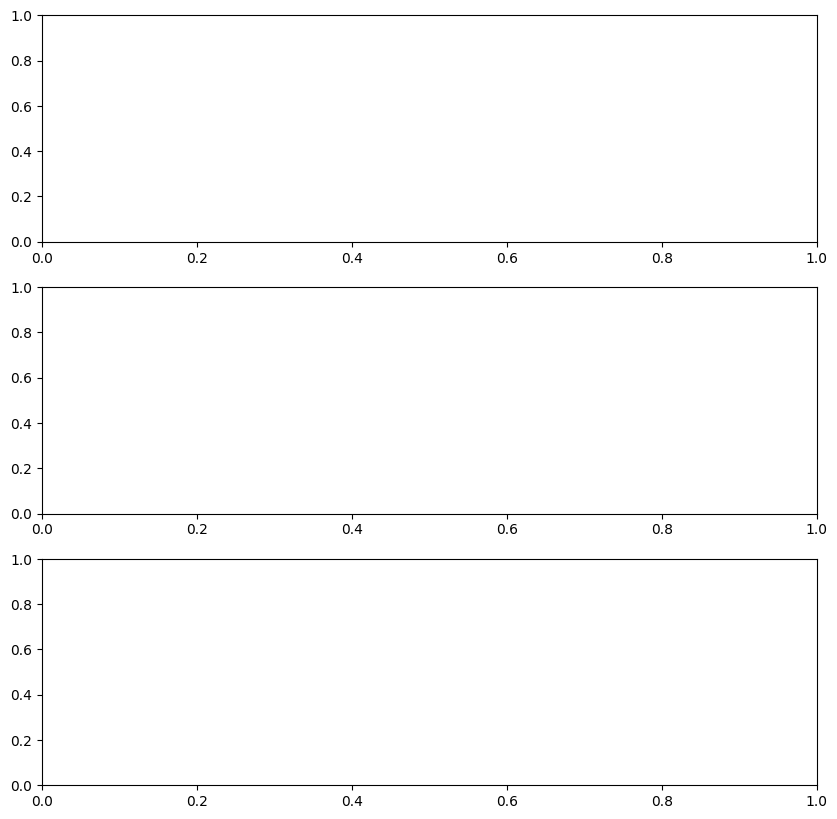

In [35]:
# yforplot=ydata['label'].astype(bool)
cat_features = xdata[['truncated','is_quote_status','user_verified' ]]
import seaborn as sns
fig , ax = plt.subplots(3,1,figsize = (10,10))     # set up 2 x 2 frame count plot with figsize 10 x 10
for i , subplots in zip (cat_features, ax.flatten()):  
  sns.countplot(cat_features[i],hue = ydata['label'].astype(bool),ax = subplots, palette = 'BuPu')
plt.show()

In [36]:
sns.heatmap(xdata.iloc[:,:].corr())

ValueError: could not convert string to float: 'Tue Jul 31 13:34:34 +0000 2018'

#### normalizing features

In [37]:
retweet_count_normalised=(xdata['retweet_count']-xdata['retweet_count'].min())/(xdata['retweet_count'].max()-xdata['retweet_count'].min())
retweet_count_normalised.describe()

count    11099.000000
mean         0.006715
std          0.029441
min          0.000000
25%          0.000000
50%          0.000031
75%          0.001036
max          1.000000
Name: retweet_count, dtype: float64

In [38]:
favorite_count_normalised=(xdata['favorite_count']-xdata['favorite_count'].min())/(xdata['favorite_count'].max()-xdata['favorite_count'].min())
favorite_count_normalised.describe()

count    11099.000000
mean         0.000391
std          0.010039
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: favorite_count, dtype: float64

In [39]:
user_followers_count_normalised=(xdata['user_followers_count']-xdata['user_followers_count'].min())/(xdata['user_followers_count'].max()-xdata['user_followers_count'].min())
user_followers_count_normalised.describe()

count    11099.000000
mean         0.000297
std          0.009960
min          0.000000
25%          0.000006
50%          0.000020
75%          0.000062
max          1.000000
Name: user_followers_count, dtype: float64

In [40]:
user_friends_count_normalised=(xdata['user_friends_count']-xdata['user_friends_count'].min())/(xdata['user_friends_count'].max()-xdata['user_friends_count'].min())
user_friends_count_normalised.describe()

count    11099.000000
mean         0.002826
std          0.014983
min          0.000000
25%          0.000380
50%          0.000866
75%          0.002187
max          1.000000
Name: user_friends_count, dtype: float64

In [41]:
user_listed_count_normalised=(xdata['user_listed_count']-xdata['user_listed_count'].min())/(xdata['user_listed_count'].max()-xdata['user_listed_count'].min())
user_listed_count_normalised.describe()

count    11099.000000
mean         0.003646
std          0.019772
min          0.000000
25%          0.000000
50%          0.000233
75%          0.001473
max          1.000000
Name: user_listed_count, dtype: float64

In [42]:
user_favourites_count_normalised=(xdata['user_favourites_count']-xdata['user_favourites_count'].min())/(xdata['user_favourites_count'].max()-xdata['user_favourites_count'].min())
user_favourites_count_normalised.describe()

count    11099.000000
mean         0.030529
std          0.061556
min          0.000000
25%          0.001654
50%          0.008709
75%          0.030785
max          1.000000
Name: user_favourites_count, dtype: float64

In [43]:
user_statuses_count_normalised=(xdata['user_statuses_count']-xdata['user_statuses_count'].min())/(xdata['user_statuses_count'].max()-xdata['user_statuses_count'].min())
user_statuses_count_normalised.describe()

count    11099.000000
mean         0.012204
std          0.031173
min          0.000000
25%          0.000892
50%          0.003490
75%          0.012002
max          1.000000
Name: user_statuses_count, dtype: float64

#### getting feature from metadata feature

In [44]:
language_codes=[]
result_types=[]
for i in range(xdata.shape[0]):
    language_codes.append(xdata['metadata'][i][23:25])
    result_types.append(xdata['metadata'][i][40:51])

feature_text=zip(language_codes,result_types)
metadata_dataframe=pd.DataFrame(feature_text,columns=["language","result_type"])
metadata_encoded=pd.get_dummies(metadata_dataframe)
print(metadata_dataframe['result_type'].value_counts())

result_type
': 'recent'    11006
code': 'ko'       47
e': 'recent       36
code': 'ru'        5
code': 'ca'        3
code': 'tr'        2
Name: count, dtype: int64


In [45]:
print(metadata_dataframe['language'].value_counts().head())
print("\n")
print(xdata['lang'].value_counts().head())


## it seems the metadata feature is fully coorelating with xdata lang feature

language
en    10623
ja      176
tl       61
',       57
in       40
Name: count, dtype: int64


lang
en    10623
ja      176
tl       61
ko       47
in       40
Name: count, dtype: int64


### Getting all feature together


In [46]:
## dataframe of all newly maded features
df = pd.DataFrame(list(zip(list_android_count,list_iphone_count,list_user_favourites_mean,list_user_favourites_median
                           ,list_user_favourites_median,list_user_friends_mean,list_user_friends_median,list_user_followers_mean
                          ,list_user_followers_median,list_user_listed_mean,list_user_listed_median,list_user_status_mean
                          ,list_user_status_median,list_user_retweet_mean,list_user_retweet_median
                          ,list_favorite_mean,list_favorite_median)),
                  columns=["list_android_count","list_iphone_count","list_user_favourites_mean","list_user_favourites_median"
                           ,"list_user_favourites_median","list_user_friends_mean","list_user_friends_median","list_user_followers_mean"
                          ,"list_user_followers_median","list_user_listed_mean","list_user_listed_median","list_user_status_mean"
                          ,"list_user_status_median","list_user_retweet_mean","list_user_retweet_median"
                          ,"list_favorite_mean","list_favorite_median"])
df

,list_android_count,list_iphone_count,list_user_favourites_mean,list_user_favourites_median,list_user_favourites_median,list_user_friends_mean,list_user_friends_median,list_user_followers_mean,list_user_followers_median,list_user_listed_mean,list_user_listed_median,list_user_status_mean,list_user_status_median,list_user_retweet_mean,list_user_retweet_median,list_favorite_mean,list_favorite_median
0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0
11095,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0
11096,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11097,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0


In [47]:
data=pd.concat([xdata['retweet_count'],xdata['favorite_count'],xdata['user_followers_count'],xdata['user_friends_count'],xdata['user_listed_count'],xdata['user_favourites_count'],xdata['user_statuses_count'],list_truncated,list_is_quote_status,df,metadata_encoded],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   retweet_count                11099 non-null  int64
 1   favorite_count               11099 non-null  int64
 2   user_followers_count         11099 non-null  int64
 3   user_friends_count           11099 non-null  int64
 4   user_listed_count            11099 non-null  int64
 5   user_favourites_count        11099 non-null  int64
 6   user_statuses_count          11099 non-null  int64
 7   False                        11099 non-null  bool 
 8   True                         11099 non-null  bool 
 9   False                        11099 non-null  bool 
 10  True                         11099 non-null  bool 
 11  list_android_count           11099 non-null  int64
 12  list_iphone_count            11099 non-null  int64
 13  list_user_favourites_mean    11099 non-null  i

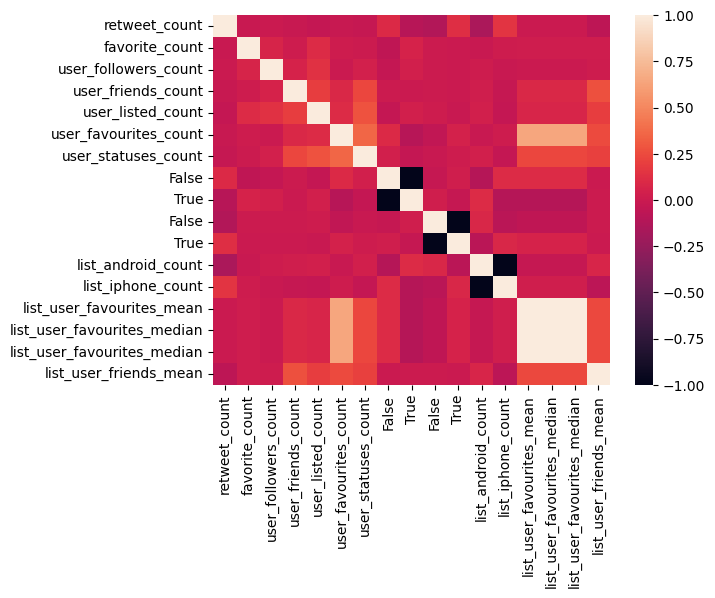

In [48]:
# heatmap of correlation
# data.corr()
sns.heatmap(data.iloc[:,:17].corr());

In [49]:
data.shape

(11099, 61)

In [50]:
def get_features(xdata):
    """
  Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
  Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
  """
    list_truncated=pd.get_dummies(xdata['truncated'])
    list_is_quote_status=pd.get_dummies(xdata['is_quote_status'])

    language_codes=[]
    result_types=[]
    for i in range(xdata.shape[0]):
        language_codes.append(xdata['metadata'][i][23:25])
        result_types.append(xdata['metadata'][i][40:51])
    feature_text=zip(language_codes,result_types)
    metadata_dataframe=pd.DataFrame(feature_text,columns=["language","result_type"])
    metadata_encoded=pd.get_dummies(metadata_dataframe)   
    
    list_android_count=[]
    list_iphone_count=[]
    for i in range(xdata.shape[0]):
        if xdata['source'][i].find("iPhone")>=0:
            list_android_count.append(0)
            list_iphone_count.append(1)
        else:
            list_android_count.append(1)
            list_iphone_count.append(0)
            
    pos_sum=0
    list_user_favourites_mean=[]
    for i in range(xdata.shape[0]):
        if int(xdata['user_favourites_count'][i])>int(xdata['user_favourites_count'].mean()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_user_favourites_mean.append(1)
        else:
            list_user_favourites_mean.append(0)
            
    pos_sum=0
    list_user_favourites_median=[]
    for i in range(xdata.shape[0]):
        if int(xdata['user_favourites_count'][i])>int(xdata['user_favourites_count'].mean()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_user_favourites_median.append(1)
        else:
            list_user_favourites_median.append(0)
    pos_sum=0
    list_user_friends_mean=[]
    for i in range(xdata.shape[0]):
        if int(xdata['user_friends_count'][i])>int(xdata['user_friends_count'].mean()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_user_friends_mean.append(1)
        else:
            list_user_friends_mean.append(0)
        
    pos_sum=0
    list_user_friends_median=[]
    for i in range(xdata.shape[0]):
        if int(xdata['user_friends_count'][i])>int(xdata['user_friends_count'].median()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_user_friends_median.append(1)
        else:
            list_user_friends_median.append(0)



    pos_sum=0
    list_user_followers_mean=[]
    for i in range(xdata.shape[0]):
        if int(xdata['user_followers_count'][i])>int(xdata['user_followers_count'].mean()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_user_followers_mean.append(1)
        else:
            list_user_followers_mean.append(0)


    pos_sum=0
    list_user_followers_median=[]
    for i in range(xdata.shape[0]):
        if int(xdata['user_followers_count'][i])>int(xdata['user_followers_count'].median()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_user_followers_median.append(1)
        else:
            list_user_followers_median.append(0)

    pos_sum=0
    list_user_listed_mean=[]
    for i in range(xdata.shape[0]):
        if int(xdata['user_listed_count'][i])>int(xdata['user_listed_count'].mean()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_user_listed_mean.append(1)
        else:
            list_user_listed_mean.append(0)

    pos_sum=0
    list_user_listed_median=[]
    for i in range(xdata.shape[0]):
        if int(xdata['user_listed_count'][i])>int(xdata['user_listed_count'].median()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_user_listed_median.append(1)
        else:
            list_user_listed_median.append(0)
        
    pos_sum=0
    list_user_status_mean=[]
    for i in range(xdata.shape[0]):
        if int(xdata['user_statuses_count'][i])>int(xdata['user_statuses_count'].mean()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_user_status_mean.append(1)
        else:
            list_user_status_mean.append(0)

    pos_sum=0
    list_user_status_median=[]
    for i in range(xdata.shape[0]):
        if int(xdata['user_statuses_count'][i])>int(xdata['user_statuses_count'].median()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_user_status_median.append(1)
        else:
            list_user_status_median.append(0)
    pos_sum=0
    list_user_retweet_mean=[]
    for i in range(xdata.shape[0]):
        if int(xdata['retweet_count'][i])>int(xdata['retweet_count'].mean()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_user_retweet_mean.append(1)
        else:
            list_user_retweet_mean.append(0)

    pos_sum=0
    list_user_retweet_median=[]
    for i in range(xdata.shape[0]):
        if int(xdata['retweet_count'][i])>int(xdata['retweet_count'].median()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_user_retweet_median.append(1)
        else:
            list_user_retweet_median.append(0)
        
        
    pos_sum=0
    list_favorite_mean=[]
    for i in range(xdata.shape[0]):
        if int(xdata['favorite_count'][i])>int(xdata['favorite_count'].mean()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_favorite_mean.append(1)
        else:
            list_favorite_mean.append(0)        
        
    pos_sum=0
    list_favorite_median=[]
    for i in range(xdata.shape[0]):
        if int(xdata['favorite_count'][i])>int(xdata['favorite_count'].median()):
            pos_sum=pos_sum+ydata.iloc[i]
            list_favorite_median.append(1)
        else:
            list_favorite_median.append(0)        

    df = pd.DataFrame(list(zip(list_android_count,list_iphone_count,list_user_favourites_mean,list_user_favourites_median
                               ,list_user_favourites_median,list_user_friends_mean,list_user_friends_median,list_user_followers_mean
                              ,list_user_followers_median,list_user_listed_mean,list_user_listed_median,list_user_status_mean
                              ,list_user_status_median,list_user_retweet_mean,list_user_retweet_median
                              ,list_favorite_mean,list_favorite_median)),
                      columns=["list_android_count","list_iphone_count","list_user_favourites_mean","list_user_favourites_median"
                               ,"list_user_favourites_median","list_user_friends_mean","list_user_friends_median","list_user_followers_mean"
                              ,"list_user_followers_median","list_user_listed_mean","list_user_listed_median","list_user_status_mean"
                              ,"list_user_status_median","list_user_retweet_mean","list_user_retweet_median"
                              ,"list_favorite_mean","list_favorite_median"])
    data=pd.concat([xdata['retweet_count'],xdata['favorite_count'],xdata['user_followers_count'],xdata['user_friends_count'],xdata['user_listed_count'],xdata['user_favourites_count'],xdata['user_statuses_count'],list_truncated,list_is_quote_status,df,metadata_encoded],axis=1)
    return data

In [51]:
data=get_features(xdata)

In [52]:
data.shape

(11099, 61)

Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

In [ ]:
# feature_metadata=get_features(xdata)
# print(feature_metadata.shape,ydata.shape)
# ydata=ydata.astype(int)
# ydata.head()

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,ydata,test_size=0.25)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8324, 61) (2775, 61) (8324, 1) (2775, 1)


In [54]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

TypeError: Feature names are only supported if all input features have string names, but your input has ['bool', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

### KNN classifier code  raw python
#### this knn is written in raw python everything from scratch inclusing distance and voting

In [55]:
def euclid_distance(first,second):
    y=0
    ans=0
    for i in range(len(first)):
        #print(first[i]-second[i])
        y=(first[i]-second[i])
        y=y**2
        ans=y+ans
    ans=ans**(1/2)
    return ans

In [56]:
euclid_distance([1,2,3],[2,3,4])

1.7320508075688772

In [57]:
def voter(y_train,list_index,k):
    sumval=0
    for i in range(len(list_index)):
        sumval=sumval+y_train.iloc[list_index[i]]
#     print(sumval)
    if float(sumval/k) >=0.5:
        return 1
    else:
        return 0

#### For your notice the below knn is working perfectly fine but this knn is written purely in python and python loops are 40000x slower than numpy so this will take ~10000 second or ~ 3hr to run this , result can be found out by running a small instance of test data

In [58]:
import sys
def knn(x_train,y_train,x_test,y_test,k):
    right_predict=0
    for i in range(x_test.shape[0]):
        if i%2==0:
            print(i)
        list_distance=[]
        list_index=[]
        for j in range(x_train.shape[0]):
            list_distance.append([euclid_distance(x_test.iloc[i],x_train.iloc[j]),j])
        list_distance=sorted(list_distance)
        for i in range(k):
            list_index.append(list_distance[i][1])
        if voter(y_train,list_index,k)==int(y_test.iloc[i]):
            right_predict=right_predict+1
    print("accuracy is :  ",right_predict/x_test.shape[0])
    right_predict/x_test.shape[0]

In [59]:
# import time
# t1 = time.perf_counter()
# knn(x_train.iloc[:],y_train,x_test.iloc[:2],y_test,5)
# t2 = time.perf_counter()
# print("total time for this knn : ",t2-t1)

### Faster knn using faster euclidean distance and faster calculation using numpy

In [60]:
def euclid_distance_numpy(first,second):
    return np.sqrt(np.sum([(first-second)**2]))

In [61]:
def voter_numpy(y_train,list_index,k):
    sumval=0
    for i in range(len(list_index)):
        sumval=sumval+y_train[list_index[i]]
#     print(sumval)
    if float(sumval/k) >=0.5:
        return 1
    else:
        return 0

In [62]:
import sys
def knn_numpy(x_train,y_train,x_test,y_test,k):
    right_predict=0
    x_train=np.array(x_train)
    x_test=np.array(x_test)
    y_train=np.array(y_train)
    y_test=np.array(y_test)
    for i in range(len(x_test)):
        if i%100==0:
            print(i)
        list_distance=[]
        list_index=[]
        for j in range(x_train.shape[0]):
            list_distance.append([euclid_distance_numpy(x_test[i],x_train[j]),j])
        list_distance=sorted(list_distance)
        for i in range(k):
            list_index.append(list_distance[i][1])
        if voter_numpy(y_train,list_index,k)==int(y_test[i]):
            right_predict=right_predict+1
    print("accuracy is :",right_predict/x_test.shape[0])
    return right_predict/x_test.shape[0]

In [64]:
import time
t1 = time.perf_counter()
knn_numpy(x_train,y_train,x_test.iloc[:100],y_test,5)
t2 = time.perf_counter()
print("total time for this knn : ",t2-t1)

0
accuracy is : 0.91
total time for this knn :  5.9465014999732375


#### knn using sklearn without using the actual classifier only using sklearn to get neighbors

In [65]:
from sklearn.neighbors import NearestNeighbors

In [66]:
def knn_sklearn(x_train,y_train,x_test,y_test,k):
    x_train=np.array(x_train)
    x_test=np.array(x_test)
    y_train=np.array(y_train)
    y_test=np.array(y_test)
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(x_train)
    distances, indices = nbrs.kneighbors(x_test)
    right_predict=0
    for i in range(len(x_test)):
        if voter_numpy(y_train,indices[i],k)==int(y_test[i]):
            right_predict=right_predict+1
    print("accuracy is :",right_predict/x_test.shape[0])
    return right_predict/x_test.shape[0]
#     print(indices[0])
#     print(indices.shape)

In [67]:
t1 = time.perf_counter()
knn_sklearn(x_train,y_train,x_test,y_test,5)
t2 = time.perf_counter()
print("total time for this knn : ",t2-t1)

accuracy is : 0.9553153153153153
total time for this knn :  0.34745083295274526


accuracy is : 0.9589189189189189
accuracy is : 0.9553153153153153
accuracy is : 0.956036036036036
accuracy is : 0.9556756756756757
accuracy is : 0.954954954954955
accuracy is : 0.9567567567567568
accuracy is : 0.9553153153153153
accuracy is : 0.956036036036036


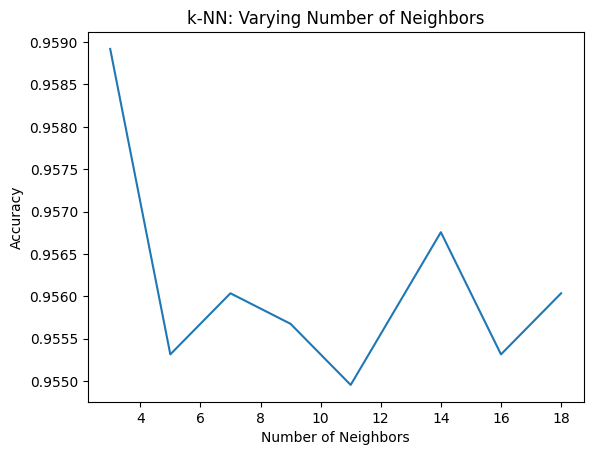

In [68]:
list_k=[3,5,7,9,11,14,16,18]
list_accuracy=[]
for i in list_k:
    list_accuracy.append(knn_sklearn(x_train,y_train,x_test,y_test,i))
plt.plot(list_k,list_accuracy)
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### as sample are imbalance i use smote to oversample the undersample class so that  there is equal voting done

In [69]:
# import imblearn
# print(imblearn.__version__)
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# oversample = SMOTE()
# x_train, y_train = oversample.fit_resample(x_train, y_train)
# counter = Counter(y_train)
# print(counter)

In [70]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=5)
# model=knn.fit(x_train, y_train)
# pred = model.predict(x_test)
# pred
# print("  Training set score: {:.2f}".format(knn.score(x_train, y_train)))
# print("  Validation set score: {:.2f}".format(knn.score(x_test, y_test)))


## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [71]:
(xdata.iloc[0,3])

'RT @EdwardTHardy: The 7th US Circuit Court of Appeals upheld a lower court ruling that blocked an Indiana mandate forcing women to undergoâ€¦'

In [72]:
(xdata.iloc[3,3])

"RT @mashable: Someone from 'The Office' actually responded to this Netflix tweet about 'The Office' https://t.co/8qBJZ1bCHu https://t.co/vJâ€¦"

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
vectorizer = TfidfVectorizer()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [74]:
def tweet_vectoriser(data,n_pca):
    """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
    list_string=[]
    for i in range(data.shape[0]):
        s1 = re.sub('http://\S+|https://\S+', '', data.iloc[i])
        s1 = re.sub('http[s]?://\S+', '', s1)
        s1 = re.sub(r"http\S+", "", s1)
        s1=re.sub(r'[0-9]','',s1)
        s1=re.sub(r'[\'".!@#$]','',s1)
        s1 = re.sub(r"@[A-Za-z0-9_]+","", s1)
        s1 = re.sub(r"#[A-Za-z0-9_]+","", s1)
        list_string.append(s1)
    scaler = StandardScaler()
    new_feature=vectorizer.fit_transform(list_string)
    new_feature= scaler.fit_transform(new_feature.todense())
    pca = PCA(n_components=n_pca)
    pca.fit(new_feature)
    new_feature = pca.transform(new_feature)
    new_feature=pd.DataFrame(new_feature)
    return new_feature
    #print(new_feature.shape)
  # your code here

In [75]:
#### when RUnn on local machine this step may give error as each value is float and 
####          there are 11000* 25000 values  sooverall pca copy   11000*25000*64(float64)==~4GB of ram google colab suggested

In [76]:
t1 = time.perf_counter()
new_feature=tweet_vectoriser(xdata.iloc[:,3],n_pca=120)
print(new_feature.shape)
t2 = time.perf_counter()
print("total time for this knn : ",t2-t1)

TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

In [ ]:
new_feature.head()

In [ ]:
## to find out the pca cummalitve variance

In [ ]:
# scaler = StandardScaler()
# X = scaler.fit_transform(new_feature)

# X.shape

# pca = PCA(n_components=10)
# pca.fit(X)
# X_pca = pca.transform(X)

# X_pca.shape

# cum_exp_var = []
# var_exp = 0
# for i in pca.explained_variance_ratio_:
#     var_exp += i
#     cum_exp_var.append(var_exp)

# # Plot cumulative explained variance for all PCs

# fig, ax = plt.subplots(figsize=(8,6))
# ax.bar(range(1,11), cum_exp_var)
# ax.set_xlabel('# Principal Components')
# ax.set_ylabel('% Cumulative Variance Explained');

Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(new_feature,ydata.iloc[:],test_size=0.25)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [77]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

TypeError: Feature names are only supported if all input features have string names, but your input has ['bool', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [78]:
import time
t1 = time.perf_counter()
knn_sklearn(x_train,y_train,x_test.iloc[:],y_test,5)
t2 = time.perf_counter()
print(t2-t1)

accuracy is : 0.9553153153153153
0.3352218749932945


accuracy is : 0.9589189189189189
accuracy is : 0.9553153153153153
accuracy is : 0.956036036036036
accuracy is : 0.9556756756756757
accuracy is : 0.954954954954955
accuracy is : 0.9567567567567568
accuracy is : 0.9553153153153153
accuracy is : 0.956036036036036


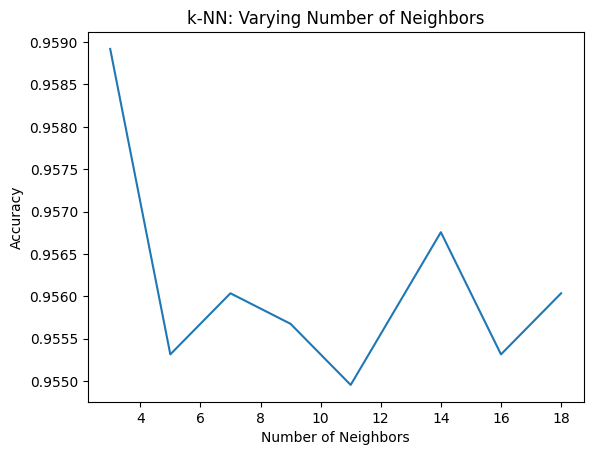

In [79]:
list_k=[3,5,7,9,11,14,16,18]
list_accuracy=[]
for i in list_k:
    list_accuracy.append(knn_sklearn(x_train,y_train,x_test,y_test,i))
plt.plot(list_k,list_accuracy)
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [80]:
## previous data has 61 feature with metadata included without that it has 34 feature
new_data=pd.concat([data,new_feature],axis=1)
new_data.shape

NameError: name 'new_feature' is not defined

Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [81]:
x_train,x_test,y_train,y_test=train_test_split(new_data,ydata,test_size=0.25)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
# knn(x_train,y_train,x_test.iloc[200:201],y_test,14)

NameError: name 'new_data' is not defined

In [82]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

TypeError: Feature names are only supported if all input features have string names, but your input has ['bool', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [83]:
import time
t1 = time.perf_counter()
knn_sklearn(x_train_norm,y_train,x_test_norm,y_test,5)
t2 = time.perf_counter()
print(t2-t1)

NameError: name 'x_train_norm' is not defined

accuracy is : 0.9589189189189189
accuracy is : 0.9553153153153153
accuracy is : 0.956036036036036
accuracy is : 0.9556756756756757
accuracy is : 0.954954954954955


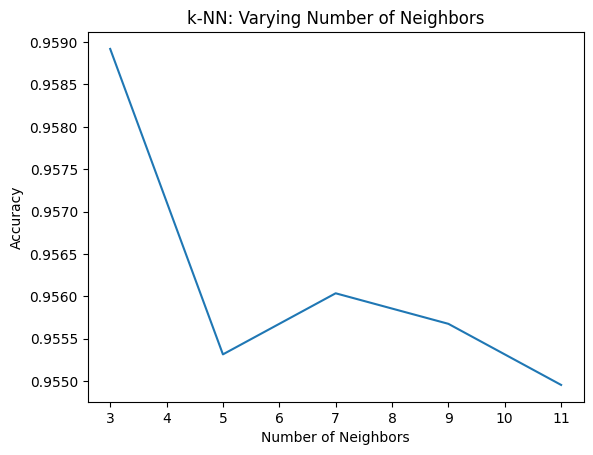

In [84]:
list_k=[3,5,7,9,11]
list_accuracy=[]
for i in list_k:
    list_accuracy.append(knn_sklearn(x_train,y_train,x_test,y_test,i))
plt.plot(list_k,list_accuracy)
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

#### Accuracy with diiferent feature set        
##### Accuracy with only metadata without text      :-              95.4 
Accuracy are like this because the counts of the value are the most important feature and second thing is data is hihgly overclassed of the positive count in label is undersampled do even if our model is a over biased model we just get 92% accuracy
If we change the train_test_data without the random seed then each time we get slightly variation in accuracy as each time the split returns diffrent data then before

##### Accuracy with only  text       :-                                          94.7

after implying tfidf i found that there are 30,000 dimension and  higher dimension are not preserving much cummlative variance about data thus even if we take 1k feature the pca only showing 0.15 variance preserved
so we can say that we are losing most of the information thus we are getting this little accuracy even smaller than the metadata
2nd reason
The other reason to get these accuracy the we can clearly see in above eda that we have much deciding features in count varibles than text
Like people which have high favorites count are tweeting positive tweet

##### Accuracy with whole dataset      :-                                   95.2

after getting features from all the feature we are having highest accuracy because we are able to get more information using whole dataset and the undersampled labels are more correctly predicted 


##### Accuracy with smote     :-                                                 95
smote is a technique which basically oversample a given undersampled the class and fit the classifier on top of that data
We can surely say that the accuracy on this dataset are much more accurate that before 




##### Different model


Different knn model might get different accuracy given that same data and same parameter as we know that different classifier may use different distance metrics and even if they have same distance metrics the sklearn classfier is using radius method to find the nearest neighbor and it try to optimise to get the better neighbors thus it use kd tree and all other algorithm which optimise and find better neighbor which in higher dimension are not always given by the euclid distance as euclid distance doesnt has much effect in higher dimensions